# Assignment no -3 kNN Classification

# Donorchoose

##### <p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

##### The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data



<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>



 
1. Preprocess essays and titles.
2. Split the dataset.
3. Vectorize seperately as per the split.
standardize data
4. Applyig knn

Intially all the text preprocessing has to be performed on the whole dataset and then we have to split the dataset into train, Cv and test datasets. After that we have to apply featurization techniques and then perform Cross validtion and build the models.






##### Objective
The primary objective is to implement the k-Nearest Neighbor Algorithm on the DonorChoose Dataset and measure the accuracy on the Test dataset


In [1]:
#Import data and modules
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

import chart_studio.plotly as py
from collections import Counter



## 1.1 Reading Data

In [2]:
#reading the DonorsChoose training data into a DataFrame
#we are loading two datas in pandas dataframe
#NOTE: Only 25000 datapoints are considered as ROC and AUC curve takes lot of time to plot and Due to computational constraints!
project_data = pd.read_csv(r'C:\Users\SAI\Downloads\Assignment_donorchoose 2018\train_data.csv',nrows=25000)
resource_data = pd.read_csv(r'C:\Users\SAI\Downloads\Assignment_donorchoose 2018\resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (25000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


##### observation
here we have 25000 projects and 17 different attributes i.e.'teacher_id' 'teacher_prefix' 'school_state''project_submitted_datetime' 'project_grade_category' and others

In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
23374,72317,p087808,598621c141cda5fb184ee7e8ccdd3fcc,Ms.,CA,2016-04-27 02:04:15,Grades PreK-2,Literacy & Language,"ESL, Literacy",iPad for Learners,Never has society so rapidly changed. Technolo...,Our Language Arts and Social Justice Magnet Sc...,"\""Is it my turn, Ms. K? When am I going to be ...","By donating to this project, you will give my ...",My students need 1 ipad mini.,127,1


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


##### Observation
Here we can see the there are 1541272 resources whicih more than no of projects also 
there are 4 columns of resorces 'id' 'description' 'quantity' 'price'.

## 1.2 preprocessing of 'project_subject_categories'

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 Preprocessing of Project_Subject_Subcategories

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_subcat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_subcat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_subcat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_subcat_dict = dict(my_counter)
sorted_sub_subcat_dict = dict(sorted(sub_subcat_dict.items(), key=lambda kv: kv[1]))

## 1.4 preprocessing of teacher_prefix

In [8]:
##NaN values in techer prefix will create a problem while One Hot encoding,so we replace NaN values with the mode of that particular column
###removing dot(.) since it is a special character
####https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

mode_of_teacher_prefix = project_data['teacher_prefix'].value_counts().index[0]
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(mode_of_teacher_prefix)
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(mode_of_teacher_prefix)


prefixes = []
for i in range(len(project_data)):
    a = project_data["teacher_prefix"][i].replace(".", "")
    prefixes.append(a)
    
project_data.drop(['teacher_prefix'], axis = 1, inplace = True)
project_data["teacher_prefix"] = prefixes
print("After removing the special characters ,Column values:")
np.unique(project_data["teacher_prefix"].values)    

After removing the special characters ,Column values:


array(['Mr', 'Mrs', 'Ms', 'Teacher'], dtype=object)

In [9]:
# We need to get rid of The spaces between the text and the hyphens because they're special characters.
#Removing multiple characters from a string in Python
#https://stackoverflow.com/questions/3411771/multiple-character-replace-with-python
project_grade_category = []
for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_").replace("-", "_")
    project_grade_category.append(a)
    
project_data.drop(['project_grade_category'], axis = 1, inplace = True)
project_data["project_grade_category"] = project_grade_category
print("After removing the special characters ,Column values:")
np.unique(project_data["project_grade_category"].values)    

After removing the special characters ,Column values:


array(['Grades_3_5', 'Grades_6_8', 'Grades_9_12', 'Grades_PreK_2'],
      dtype=object)

## 1.5 Text preprocessing

In [10]:
# merge two column text dataframe:
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(5)

,Unnamed: 0,id,teacher_id,school_state,Date,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,teacher_prefix,project_grade_category,essay
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,GA,2016-04-27 00:53:00,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,Mrs,Grades_PreK_2,I recently read an article about giving studen...
23374,72317,p087808,598621c141cda5fb184ee7e8ccdd3fcc,CA,2016-04-27 02:04:15,iPad for Learners,Never has society so rapidly changed. Technolo...,Our Language Arts and Social Justice Magnet Sc...,"\""Is it my turn, Ms. K? When am I going to be ...","By donating to this project, you will give my ...",My students need 1 ipad mini.,127,1,Literacy_Language,ESL Literacy,Mr,Grades_6_8,Never has society so rapidly changed. Technolo...
7176,79341,p091436,bb2599c4a114d211b3381abe9f899bf8,OH,2016-04-27 07:24:47,Robots are Taking over 2nd Grade,"Computer coding and robotics, my second grader...","We are a small, rural school in Northwest Ohio...",We have a new technology teacher to our distri...,You can help this dream of ours become a reali...,My students need a robot mouse STEM activity s...,72,1,Math_Science AppliedLearning,AppliedSciences EarlyDevelopment,Ms,Grades_6_8,"Computer coding and robotics, my second grader..."
5145,50256,p203475,63e9a9f2c9811a247f1aa32ee6f92644,CA,2016-04-27 08:45:34,Books to Power Powerful Book Clubs!,Do you remember the book you read that made yo...,My students are part of an exciting adventure....,"We are fortunate enough to be a \""project scho...",As a new teacher my book shelves are bare or t...,My students need books to help support their h...,6,1,Literacy_Language,Literacy,Mrs,Grades_PreK_2,Do you remember the book you read that made yo...
2521,164738,p248458,40da977f63fb3d85589a063471304b11,NJ,2016-04-27 09:33:03,Supplies to Support my Struggling Readers!!,My students are all struggling readers. I supp...,My students live in a lower income area in Cen...,The materials I am requesting will be used dur...,Imagine not being able to read the text you ar...,My students need phonics and reading comprehen...,27,0,Literacy_Language,Literacy Literature_Writing,Mrs,Grades_PreK_2,My students are all struggling readers. I supp...


In [12]:
# printing some random reviews

print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[500])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[2000])
print("="*50)

I recently read an article about giving students a choice about how they learn. We already set goals; why not let them choose where to sit, and give them options of what to sit on?I teach at a low-income (Title 1) school. Every year, I have a class with a range of abilities, yet they are all the same age. They learn differently, and they have different interests. Some have ADHD, and some are fast learners. Yet they are eager and active learners that want and need to be able to move around the room, yet have a place that they can be comfortable to complete their work.We need a classroom rug that we can use as a class for reading time, and students can use during other learning times. I have also requested four Kore Kids wobble chairs and four Back Jack padded portable chairs so that students can still move during whole group lessons without disrupting the class. Having these areas will provide these little ones with a way to wiggle while working.Benjamin Franklin once said, \"Tell me an

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):#https://stackoverflow.com/a/47091490/4084039
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

My students are hardworking, dedicated, students who come to school every day in spite of the daily challenges they face. They live in a high poverty neighborhood, and each and every student receives a free breakfast and lunch from school. The surrounding neighborhood is gang infested, and often violent, but that does not deter my students from coming to school.\r\n\r\n    After seeing \"He Named Me Malala\" my students came back to school with a new found appreciation for their free and public education.\r\nMy students will read \"I am Malala\" aloud, together with their classmates, over several weeks. After they have read the book they will use the Kindle Fires to do a research project on education, and the lack thereof, in countries other than the United States. They will choose a country that does not provide a free and public education for its children, or a country that limits education to boys only. They may also choose to research the Syrian refugee crisis and how it is affecti

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are hardworking, dedicated, students who come to school every day in spite of the daily challenges they face. They live in a high poverty neighborhood, and each and every student receives a free breakfast and lunch from school. The surrounding neighborhood is gang infested, and often violent, but that does not deter my students from coming to school.        After seeing  He Named Me Malala  my students came back to school with a new found appreciation for their free and public education.  My students will read  I am Malala  aloud, together with their classmates, over several weeks. After they have read the book they will use the Kindle Fires to do a research project on education, and the lack thereof, in countries other than the United States. They will choose a country that does not provide a free and public education for its children, or a country that limits education to boys only. They may also choose to research the Syrian refugee crisis and how it is affecting the chi

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are hardworking dedicated students who come to school every day in spite of the daily challenges they face They live in a high poverty neighborhood and each and every student receives a free breakfast and lunch from school The surrounding neighborhood is gang infested and often violent but that does not deter my students from coming to school After seeing He Named Me Malala my students came back to school with a new found appreciation for their free and public education My students will read I am Malala aloud together with their classmates over several weeks After they have read the book they will use the Kindle Fires to do a research project on education and the lack thereof in countries other than the United States They will choose a country that does not provide a free and public education for its children or a country that limits education to boys only They may also choose to research the Syrian refugee crisis and how it is affecting the children involved by keeping the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
#Combining all above the statesment.
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████| 25000/25000 [00:25<00:00, 968.97it/s]


In [19]:
# after preprocesing
preprocessed_essays[1000]

'students become artists school year dove head first new art program developed student special day programs classified emotionally disturbed kids tend work better small groups projects allow get move around listen music work hands freely often times regular education classrooms many kids rigor work overwhelming kids sometimes not know work emotions help created art program focusing 3d art pottery allows access creative juices environment feels safe welcoming art program success school asked teach 2nd class art students special day classes classified intellectually disabled excited able expand pottery project allow students experience art daily basis school year launched pottery project introduced pottery students week thursdays fridays students much fun learned throw wheels learned hand build clay rest week spent 2d 3d art projects included making 3d conversational heart 3d words trees created wire paper mache masks boxes used wood burning tools next school year multiple students sdc p

## 1.5-b Preprocessing of `project_title`

In [20]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentence in tqdm(project_data['project_title'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████| 25000/25000 [00:01<00:00, 17163.68it/s]


In [21]:
preprocessed_titles[1000]

'art a hard days work'

In [22]:
project_data['clean_titles'] = preprocessed_titles

In [23]:
project_data.count()

Unnamed: 0                                      25000
id                                              25000
teacher_id                                      25000
school_state                                    25000
Date                                            25000
project_title                                   25000
project_essay_1                                 25000
project_essay_2                                 25000
project_essay_3                                   831
project_essay_4                                   831
project_resource_summary                        25000
teacher_number_of_previously_posted_projects    25000
project_is_approved                             25000
clean_categories                                25000
clean_subcategories                             25000
teacher_prefix                                  25000
project_grade_category                          25000
essay                                           25000
clean_titles                

Uptil here we preprocessed  donor choose data.
Next is to split  data in train,test and CV
 then we have to vectorize data for BoW,TFIDF,Avg W2Vec and TFIDF weighted W2Vec

## 1.6 Test - Train  Data Spliting

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],\
test_size=0.33, stratify = project_data['project_is_approved'])
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [25]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [26]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(11222, 18) (11222,)
(5528, 18) (5528,)
(8250, 18) (8250,)


## 1.7 Preparing Data for Models

In [27]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state', 'Date',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'teacher_prefix',
       'project_grade_category', 'essay', 'clean_titles'],
      dtype='object')

##### we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## 1.7.1 Vectorizing Categorical data

•https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

## 1.7.1.a) One hot encode - Clean categories of project_subject_category

In [28]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
categories_one_hot_train = vectorizer.fit_transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix of Train data after one hot encoding  (11222, 9)
Shape of matrix of Test data after one hot encoding  (8250, 9)
Shape of matrix of CV data after one hot encoding  (5528, 9)


## 1.7.1.b)One hot encode-Clean categories of project_sub_subcategories

In [29]:
# we use count vectorizer to convert the values into one
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_subcat_dict.keys()), lowercase=False,
binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizer.fit_transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv
.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'ESL', 'EarlyDevelopment', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix of Train data after one hot encoding  (11222, 30)
Shape of matrix of Test data after one hot encoding  (8250, 30)
Shape of matrix of Cross Validation data after one hot encoding  (5528, 30)


## 1.7.1.c)One hot encode - School states

In [30]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

In [31]:
school_states_dict = dict(my_counter)
sorted_school_states_dict = dict(sorted(school_states_dict.items(), key=lambda kv: kv[1]))

In [32]:
## we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_school_states_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)




school_state_categories_one_hot_train = vectorizer.fit_transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)


print("Shape of matrix of Train data after one hot encoding",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding",school_state_categories_one_hot_cv.shape)

Shape of matrix of Train data after one hot encoding (11222, 51)
Shape of matrix of Test data after one hot encoding  (8250, 51)
Shape of matrix of Cross Validation data after one hot encoding (5528, 51)


## 1.7.1.d) One hot encode - Teacher_prefix

In [33]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [34]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [35]:
## we use count vectorizer to convert the values into one hot encoded features
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nanis-an-invalid-document/39308809#39308809
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_categories_one_hot_train = vectorizer.fit_transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))
teacher_prefix_categories_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype("U"))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",teacher_prefix_categories_one_hot_cv.shape)

['Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encoding  (11222, 4)
Shape of matrix after one hot encoding  (8250, 4)
Shape of matrix after one hot encoding  (5528, 4)


## 1.7.1.e) One hot encode - project_grade_category

In [36]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [37]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [38]:
## we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
project_grade_categories_one_hot_train = vectorizer.fit_transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix of Train data after one hot encoding",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding",project_grade_categories_one_hot_cv.shape)

['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']
Shape of matrix of Train data after one hot encoding (11222, 4)
Shape of matrix of Test data after one hot encoding  (8250, 4)
Shape of matrix of Cross Validation data after one hot encoding (5528, 4)


## 1.7.2 Vectorizing Text data

### 1.7.2.1-a Bag of words project essays

In [39]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.fit_transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(11222, 5000) (11222,)
(5528, 5000) (5528,)
(8250, 5000) (8250,)


### 1.7.2.1-b Bag of words of project title

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer.fit_transform(X_train['clean_titles'].values)
X_cv_titles_bow = vectorizer.transform(X_cv['clean_titles'].values)
X_test_titles_bow = vectorizer.transform(X_test['clean_titles'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_cv_titles_bow.shape, y_cv.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(11222, 732) (11222,)
(5528, 732) (5528,)
(8250, 732) (8250,)


### 1.7.2.2 -a TFIDF vectorizer project_essays

In [41]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X_train_essay_tfidf = vectorizer.fit_transform((X_train['essay'].values))
X_cv_essay_tfidf = vectorizer.transform((X_cv['essay'].values))
X_test_essay_tfidf = vectorizer.transform((X_test['essay'].values))
print("After vectorizations")
print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_cv_essay_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_essay_tfidf.shape)


After vectorizations
Shape of matrix after one hot encodig  (11222, 6763)
Shape of matrix after one hot encodig  (5528, 6763)
Shape of matrix after one hot encodig  (8250, 6763)


### 1.7.2.2 -b TFIDF vectorizer project_titles

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X_train_titles_tfidf = vectorizer.fit_transform((X_train['clean_titles'].values))
X_cv_titles_tfidf = vectorizer.transform((X_cv['clean_titles'].values))
X_test_titles_tfidf = vectorizer.transform((X_test['clean_titles'].values))
print("Shape of matrix after one hot encodig ",X_train_titles_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_cv_titles_tfidf.shape)
print("Shape of matrix after one hot encodig ",X_test_titles_tfidf.shape)

Shape of matrix after one hot encodig  (11222, 732)
Shape of matrix after one hot encodig  (5528, 732)
Shape of matrix after one hot encodig  (8250, 732)


### 1.7.2.3-a Using Pretrained Models: Avg W2V

In [43]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [44]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open(r'C:\Users\SAI\Downloads\Assignment_donorchoose 2018\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

#### Avg W2V Train Essay

In [45]:
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm((X_train['essay'].values)): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|███████████████████████████████████| 11222/11222 [00:14<00:00, 790.97it/s]


11222
300


#### Avg W2V CV Essay

In [46]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm((X_cv['essay'].values)): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|█████████████████████████████████████| 5528/5528 [00:06<00:00, 795.63it/s]


5528
300


#### Avg W2V Test Essay

In [47]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm((X_test['essay'].values)): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|████████████████████████████████████| 8250/8250 [00:07<00:00, 1090.76it/s]


8250
300


####  Avg W2V - project_title for Train,CV and Test

In [48]:
# Similarly we can vectorize for title also
avg_w2v_vectors_train_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm((X_train['clean_titles'].values)): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_titles.append(vector)

print(len(avg_w2v_vectors_train_titles))
print(len(avg_w2v_vectors_train_titles[0]))


100%|█████████████████████████████████| 11222/11222 [00:00<00:00, 18516.36it/s]


11222
300


In [49]:
avg_w2v_vectors_cv_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm((X_cv['clean_titles'].values)): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_titles.append(vector)

print(len(avg_w2v_vectors_cv_titles))
print(len(avg_w2v_vectors_cv_titles[0]))

100%|███████████████████████████████████| 5528/5528 [00:00<00:00, 22829.04it/s]


5528
300


In [50]:
avg_w2v_vectors_test_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm((X_test['clean_titles'].values)): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_titles.append(vector)

print(len(avg_w2v_vectors_test_titles))
print(len(avg_w2v_vectors_test_titles[0]))

100%|███████████████████████████████████| 8250/8250 [00:00<00:00, 18246.91it/s]


8250
300


### 1.7.2.3-b Using Pretrained Models: TFIDF weighted W2V

In [51]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit((X_train['essay'].values))
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [52]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train_essay.append(vector)

print(len(tfidf_w2v_vectors_train_essay))
print(len(tfidf_w2v_vectors_train_essay[0]))

100%|███████████████████████████████████| 11222/11222 [01:34<00:00, 119.02it/s]


11222
300


In [53]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test_essay.append(vector)

print(len(tfidf_w2v_vectors_test_essay))
print(len(tfidf_w2v_vectors_test_essay[0]))

100%|█████████████████████████████████████| 8250/8250 [01:07<00:00, 122.07it/s]


8250
300


In [54]:
# compute average word2vec for each review.
tfidf_w2v_vectors_cv_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv_essay.append(vector)

print(len(tfidf_w2v_vectors_cv_essay))
print(len(tfidf_w2v_vectors_cv_essay[0]))

100%|█████████████████████████████████████| 5528/5528 [00:45<00:00, 122.47it/s]


5528
300


### TFIDF weighted W2V - project_title for Train, Test and CV

In [55]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_titles'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [56]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train_titles.append(vector)

print(len(tfidf_w2v_vectors_train_titles))
print(len(tfidf_w2v_vectors_train_titles[0]))

100%|█████████████████████████████████| 11222/11222 [00:00<00:00, 12621.21it/s]


11222
300


In [57]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv_titles.append(vector)

print(len(tfidf_w2v_vectors_cv_titles))
print(len(tfidf_w2v_vectors_cv_titles[0]))

100%|███████████████████████████████████| 5528/5528 [00:00<00:00, 11782.87it/s]


5528
300


In [58]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test_titles.append(vector)

print(len(tfidf_w2v_vectors_test_titles))
print(len(tfidf_w2v_vectors_test_titles[0]))

100%|███████████████████████████████████| 8250/8250 [00:00<00:00, 11760.70it/s]


8250
300


## 1.7.3 Vectorizing Numerical features

#### 1.7.3 - a-Price

In [59]:
import pandas as pd
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [60]:
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [61]:
# join two dataframes in python:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')

In [62]:
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['price'].values.reshape(-1,1))

X_train_price_std = standard_vec.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = standard_vec.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = standard_vec.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)

After vectorizations
(11222, 1) (11222,)
(5528, 1) (5528,)
(8250, 1) (8250,)


In [63]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.7497976, Standard deviation : 374.8142029086185


In [64]:
price_standardized

array([[ 0.48634817],
       [ 0.00330885],
       [-0.66110034],
       ...,
       [ 0.20599594],
       [-0.31242092],
       [-0.08051935]])

#### 1.7.3-b Vectorizing numerical features: teacher_number_of_previously posted projects

In [65]:
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projects_std = standard_vec.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_std = standard_vec.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projects_std = standard_vec.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

After vectorizations
(11222, 1) (11222,)
(5528, 1) (5528,)
(8250, 1) (8250,)


#### 1.7.3-c On Quantity

In [66]:
from sklearn.preprocessing import StandardScaler
standard_vec = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec.fit(X_train['quantity'].values.reshape(-1,1))

X_train_qty_std = standard_vec.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_qty_std = standard_vec.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_qty_std = standard_vec.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_std.shape, y_train.shape)
print(X_cv_projects_std.shape, y_cv.shape)
print(X_test_projects_std.shape, y_test.shape)
print("="*100)

After vectorizations
(11222, 1) (11222,)
(5528, 1) (5528,)
(8250, 1) (8250,)


In [67]:
#function to get heatmap confusion matrix
def get_confusion_matrix(clf,X_te,y_test):
    y_pred = clf.predict(X_te)
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [68]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_categories_one_hot_train,teacher_prefix_categories_one_hot_train,project_grade_categories_one_hot_train,X_train_essay_bow,X_train_titles_bow,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,project_grade_categories_one_hot_cv,X_cv_essay_bow,X_cv_titles_bow,X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_categories_one_hot_test,teacher_prefix_categories_one_hot_test,project_grade_categories_one_hot_test,X_test_essay_bow,X_test_titles_bow,X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(11222, 5833) (11222,)
(5528, 5833) (5528,)
(8250, 5833) (8250,)


# Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

#### note
k- Nearest Neighbors(kNN) algorithm is one of the simplest,non-parametric,lazy classification learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

This algorithm is one of the more simple techniques used in machine learning. 
It is a method preferred by many in the industry because of its ease of use and 
low calculation time.

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Note-

When we need to check or visualize the performance of the multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)

## 2.1 [Set 1] - Categorical, numerical features + project_title (BoW)+preprocessed_essays(BoW)

#### 2.1 a) Find the best hyper parameter which results in the maximum AUC value

In [69]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████████████████████████████████████| 14/14 [10:15<00:00, 44.25s/it]


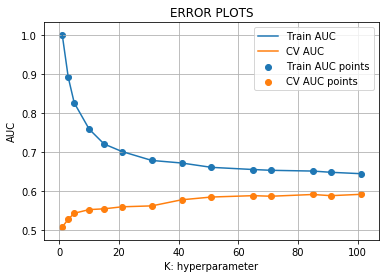

In [70]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.
y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or no
n-thresholded measure of
decisions (as returned by “decision_function” on some classifiers).
For binary y_true, y_score is supposed to be the score of the class with greater label.
"""
train_auc = []
cv_auc = []
a = []
b = []

K = [1, 3, 5, 10, 15, 21, 31, 41, 51, 65, 71,85,91,101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)
    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

##### 2.1-b) Simple CV

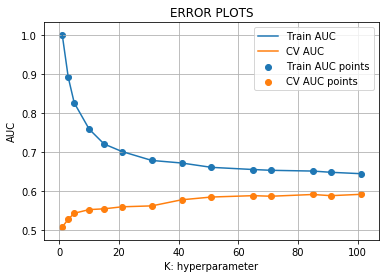

Wall time: 10min 7s


In [71]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [1, 3, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91, 101]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)

    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [72]:
best_k_1 = 51

#### 2.1- c) Train the model for the best hyper parameter value

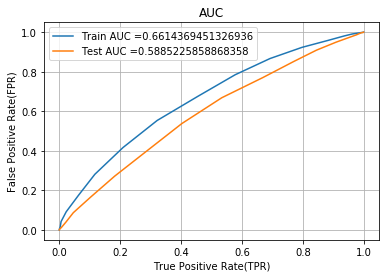

In [73]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
neigh = KNeighborsClassifier(n_neighbors=best_k_1)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### 2.1-d Confusion Matrix

In [74]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

#### For Train data

In [75]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24805741881815135 for threshold 0.824
[[ 932  781]
 [3077 6432]]


In [76]:
conf_matr_df_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24805741881815135 for threshold 0.824


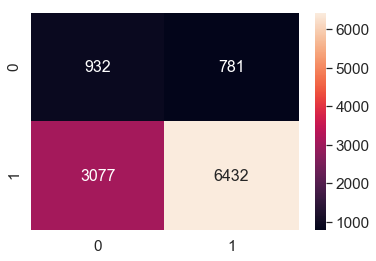

In [77]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train, annot=True,annot_kws={"size": 16}, fmt='g')

#### for test data

In [78]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24886046832937875 for threshold 0.843
[[ 752  507]
 [3229 3762]]


In [79]:
conf_matr_df_test = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24886046832937875 for threshold 0.843


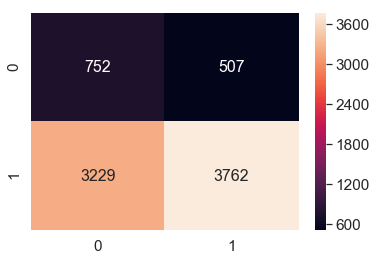

In [80]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test, annot=True,annot_kws={"size": 16}, fmt='g')

## 2.2 [Set 2] - Categorical, numerical features + project_title (TFIDF) +preprocessed_essays(TFIDF)

In [81]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_categories_one_hot_train,teacher_prefix_categories_one_hot_train,project_grade_categories_one_hot_train,X_train_essay_tfidf,X_train_titles_tfidf,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,project_grade_categories_one_hot_cv,X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_categories_one_hot_test,teacher_prefix_categories_one_hot_test,project_grade_categories_one_hot_test,X_test_essay_tfidf,X_test_titles_tfidf,X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(11222, 7596) (11222,)
(5528, 7596) (5528,)
(8250, 7596) (8250,)


### 2.2 a) Find the best hyper parameter which results in the maximum AUC value

100%|██████████████████████████████████████████| 14/14 [09:37<00:00, 41.49s/it]


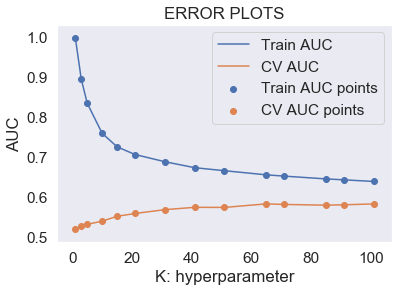

Wall time: 9min 37s


In [82]:
%%time
train_auc = []
cv_auc = []
K = [1, 3, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91, 101]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)
    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)
    
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.2-b)Simple CV

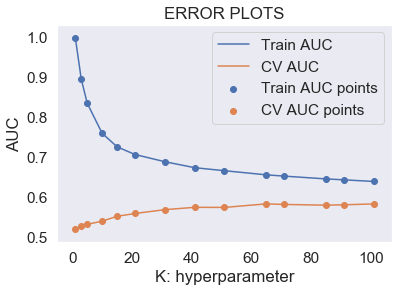

Wall time: 9min 28s


In [83]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
K = [1, 3, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91, 101]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)
    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [84]:

n_neighbors=65

### 2.2-c) Train the model for the best maximum AUC value

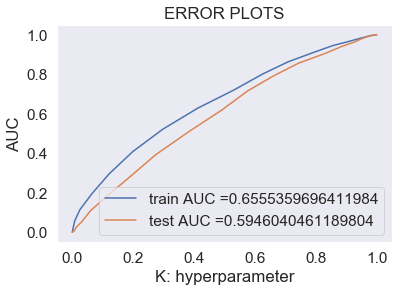

Wall time: 47.5 s


In [85]:
%%time
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=65)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr)    
y_test_pred = batch_predict(neigh, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.2-d) Confusion Matrix

##### For Train Data

In [86]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2491309034412509 for threshold 0.831
[[ 806  907]
 [2673 6836]]


In [87]:
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2491309034412509 for threshold 0.831


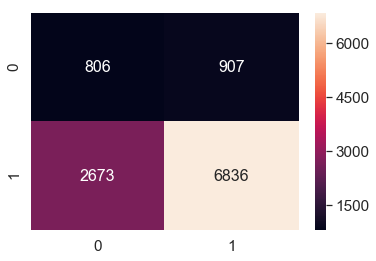

In [88]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

#### For Test Data

In [89]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.249901424595967 for threshold 0.846
[[ 642  617]
 [2674 4317]]


In [90]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.249901424595967 for threshold 0.846


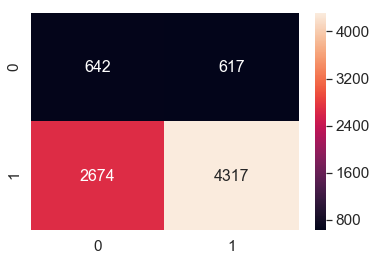

In [91]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## 2.3) [Set 3] : categorical, numerical features + project_title(AVG W2V) +preprocessed_essay (AVG W2V)

In [92]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_categories_one_hot_train,teacher_prefix_categories_one_hot_train,project_grade_categories_one_hot_train,avg_w2v_vectors_train,avg_w2v_vectors_train_titles,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,project_grade_categories_one_hot_cv,avg_w2v_vectors_cv,avg_w2v_vectors_cv_titles,X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_categories_one_hot_test,teacher_prefix_categories_one_hot_test,project_grade_categories_one_hot_test,avg_w2v_vectors_test,avg_w2v_vectors_test_titles,X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(11222, 701) (11222,)
(5528, 701) (5528,)
(8250, 701) (8250,)


### 2.3-a) Find the best hyper parameter which results in the maximum AUC value

100%|███████████████████████████████████████| 13/13 [1:30:37<00:00, 449.52s/it]


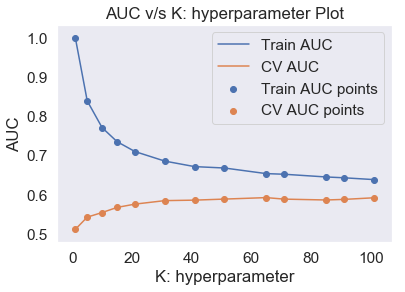

In [93]:
train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)
    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)
    
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot")
plt.grid()
plt.show()

### 2.3-b) Simple-cv

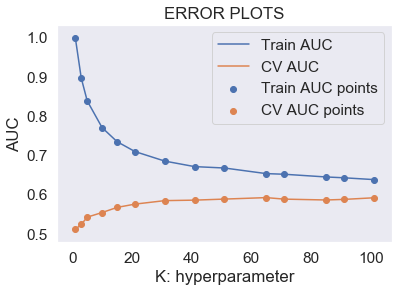

Wall time: 1h 33min 40s


In [94]:
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [1, 3, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91, 101]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)
    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)
    
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


In [95]:
best_k_3 = 65

### 2.3- C) Train model using the best hyper-parameter value

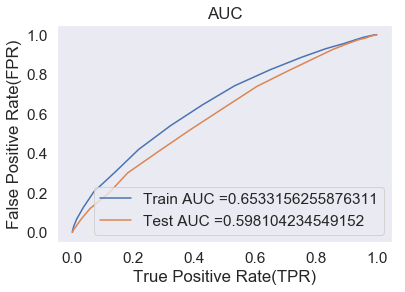

Wall time: 7min 49s


In [96]:
%%time
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
neigh = KNeighborsClassifier(n_neighbors=best_k_3)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### 2.3-D)Confusion Matrix

### For Train Data

In [97]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24891211705140015 for threshold 0.831
[[ 800  913]
 [2459 7050]]


In [98]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24891211705140015 for threshold 0.831


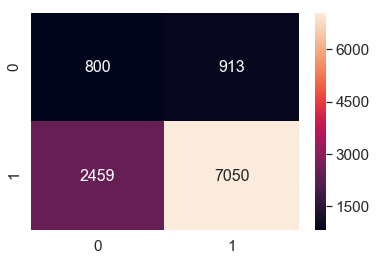

In [99]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g')

#### For Test Data

In [100]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24995441873317514 for threshold 0.831
[[ 495  764]
 [1827 5164]]


In [101]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24995441873317514 for threshold 0.831


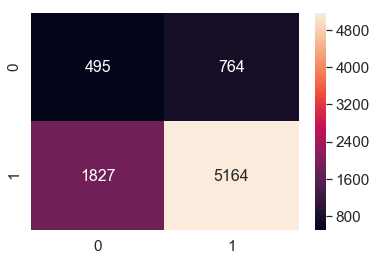

In [102]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g')

### 2.4) Set 4 : categorical, numerical features + project_title(TFIDF W2V) +preprocessed_essay (TFIDF W2V)

In [103]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_categories_one_hot_train,teacher_prefix_categories_one_hot_train,project_grade_categories_one_hot_train,tfidf_w2v_vectors_train_essay,tfidf_w2v_vectors_train_titles,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,project_grade_categories_one_hot_cv,tfidf_w2v_vectors_cv_essay,tfidf_w2v_vectors_cv_titles,X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_categories_one_hot_test,teacher_prefix_categories_one_hot_test,project_grade_categories_one_hot_test,tfidf_w2v_vectors_test_essay,tfidf_w2v_vectors_test_titles,X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(11222, 701) (11222,)
(5528, 701) (5528,)
(8250, 701) (8250,)


### 2.4-a) Find the best hyper paramter which results in the maximum AUC value

100%|███████████████████████████████████████| 13/13 [1:29:48<00:00, 410.56s/it]


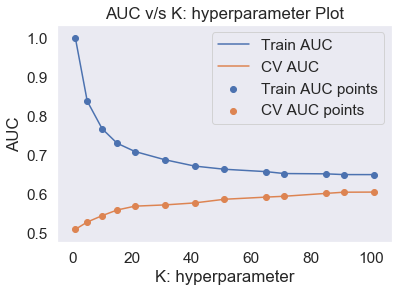

Wall time: 1h 29min 48s


In [104]:
%%time
train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)
    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)
    
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot")
plt.grid()
plt.show()

#### 2.4-b)  Simple cv

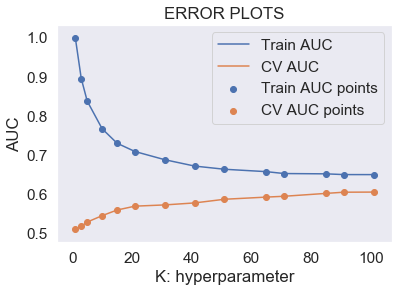

Wall time: 1h 32min 2s
Wall time: 1h 32min 2s


In [105]:
%%time
%%time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [1, 3, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91, 101]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)
    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)
    
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [106]:
best_k_4 = 71

### 2.4-c) Train model using the best hyper-parameter value

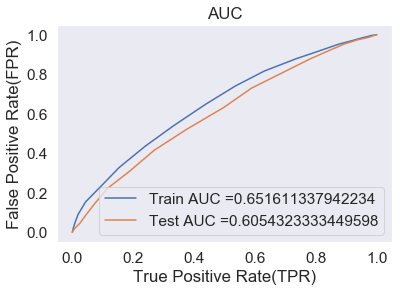

Wall time: 7min 13s


In [107]:
%%time
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
neigh = KNeighborsClassifier(n_neighbors=best_k_4)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_tr)
y_test_pred = batch_predict(neigh, X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

#### 2.4-d) Confusion Matrix

#### For Train Data

In [108]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2487526279073968 for threshold 0.831
[[ 796  917]
 [2470 7039]]


In [109]:
conf_matr_df_train_3 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.2487526279073968 for threshold 0.831


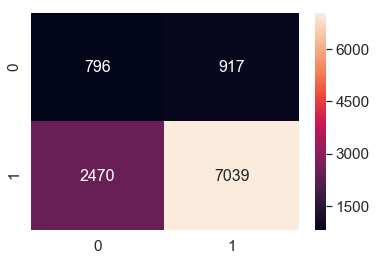

In [110]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_3, annot=True,annot_kws={"size": 16}, fmt='g')


#### For Test Data

In [111]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24998091580177925 for threshold 0.845
[[ 635  624]
 [2587 4404]]


In [112]:
conf_matr_df_test_3 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24998091580177925 for threshold 0.845


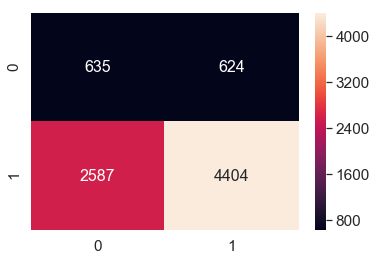

In [113]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_3, annot=True,annot_kws={"size": 16}, fmt='g')

## 2.5 Feature selection with `SelectKBest` 

In [151]:
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_categories_one_hot_train,teacher_prefix_categories_one_hot_train,project_grade_categories_one_hot_train,X_train_essay_tfidf,X_train_titles_tfidf,X_train_price_std,X_train_projects_std,X_train_qty_std)).tocsr()
X_cv = hstack((categories_one_hot_cv,sub_categories_one_hot_cv,school_state_categories_one_hot_cv,teacher_prefix_categories_one_hot_cv,project_grade_categories_one_hot_cv,X_cv_essay_tfidf,X_cv_titles_tfidf,X_cv_price_std,X_cv_projects_std,X_cv_qty_std)).tocsr()
X_te = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_categories_one_hot_test,teacher_prefix_categories_one_hot_test,project_grade_categories_one_hot_test,X_test_essay_tfidf,X_test_titles_tfidf,X_test_price_std,X_test_projects_std,X_test_qty_std)).tocsr()



In [166]:

from sklearn.feature_selection import SelectKBest, chi2
X_tr_new = SelectKBest(chi2, k=2000).fit_transform(X_tr, y_train)
X_te_new = SelectKBest(chi2, k=2000).fit_transform(X_te, y_test)
X_cv_new = SelectKBest(chi2, k=2000).fit_transform(X_cv, y_cv)


In [167]:
print("Final Data matrix")
print(X_tr_new.shape, y_train.shape)
print(X_cv_new.shape, y_cv.shape)
print(X_te_new.shape, y_test.shape)
print("="*100)

Final Data matrix
(11222, 2000) (11222,)
(5528, 2000) (5528,)
(8250, 2000) (8250,)


### 2.5-a) Find the best hyper parameter which results in the maximum AUC value

100%|██████████████████████████████████████████| 12/12 [03:14<00:00, 16.26s/it]


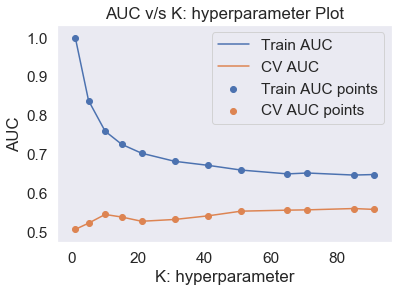

In [168]:
train_auc = []
cv_auc = []

K = [1, 5, 10, 15, 21, 31, 41, 51, 65, 71, 85, 91]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr_new, y_train)

    y_train_pred = batch_predict(neigh, X_tr_new)    
    y_cv_pred = batch_predict(neigh, X_cv_new)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("AUC v/s K: hyperparameter Plot")
plt.grid()
plt.show()

### 2.5-b) Simple-cv

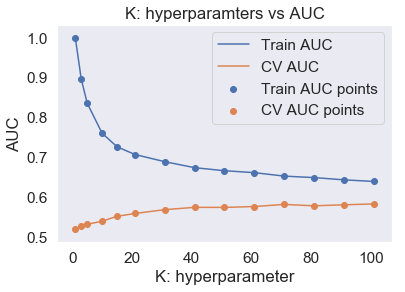

In [169]:
train_auc = []
cv_auc = []
K = [1, 3, 5, 10, 15, 21, 31, 41, 51, 61, 71, 81, 91, 101]

for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_tr, y_train)
    y_train_pred = batch_predict(neigh, X_tr)
    y_cv_pred = batch_predict(neigh, X_cv)
    
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("K: hyperparamters vs AUC")
plt.grid()
plt.show()

In [170]:
best_k_5 = 85

### 2.5-c) Train model using the best hyper-parameter value

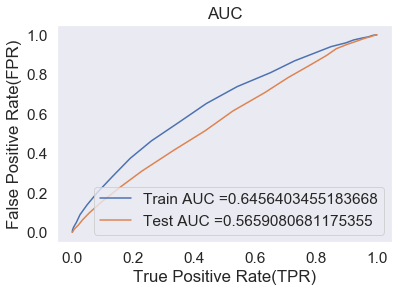

In [171]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

neigh = KNeighborsClassifier(n_neighbors=best_k_5)
neigh.fit(X_tr_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_new)    
y_test_pred = batch_predict(neigh, X_te_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### 2.5-d) Confusion Matrix

#### For Train Data

In [172]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24825780261446329 for threshold 0.824
[[ 785  928]
 [2497 7012]]


In [173]:
conf_matr_df_train_4 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24825780261446329 for threshold 0.824


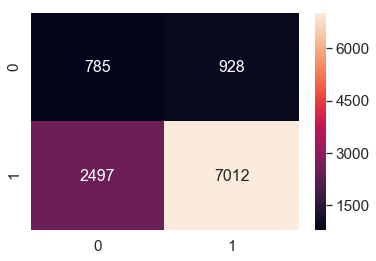

In [177]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_4, annot=True,annot_kws={"size": 16}, fmt='g')

#### For Test Data

In [178]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24924909200223838 for threshold 0.847
[[ 595  664]
 [2699 4292]]


In [179]:
conf_matr_df_test_4 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.24924909200223838 for threshold 0.847


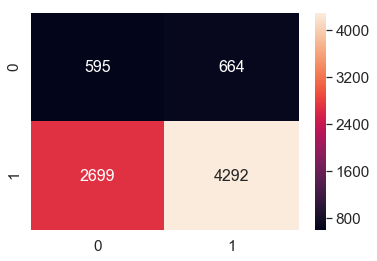

In [180]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_4, annot=True,annot_kws={"size": 16}, fmt='g')

### Conclusions

In [182]:
# Compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["BOW", "Brute", 51, 0.58])
x.add_row(["TFIDF", "Brute", 65, 0.59])
x.add_row(["AVG W2V", "Brute", 65, 0.59])
x.add_row(["TFIDF W2V", "Brute", 71, 0.60])
x.add_row(["TFIDF", "Top 2000", 85, 0.56])

print(x)

+------------+----------+-----------------+------+
| Vectorizer |  Model   | Hyper Parameter | AUC  |
+------------+----------+-----------------+------+
|    BOW     |  Brute   |        51       | 0.58 |
|   TFIDF    |  Brute   |        65       | 0.59 |
|  AVG W2V   |  Brute   |        65       | 0.59 |
| TFIDF W2V  |  Brute   |        71       | 0.6  |
|   TFIDF    | Top 2000 |        85       | 0.56 |
+------------+----------+-----------------+------+
